In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy.signal.windows import gaussian
from scipy.ndimage import convolve1d
import yfinance as yf
import matplotlib.pyplot as plt


# Init all data
df1 = pd.read_csv('spdr.csv', usecols=['Date', 'Open', 'Close'])
df2 = pd.read_csv('dxy.csv', usecols=['Date', 'Open', 'Close'])
df3 = pd.read_csv('r.csv', usecols=['Date', 'Fed Rate'])
df4 = yf.download('^GSPC', start='1930-01-01') #S&P 500
df5 = pd.read_csv('cpi.csv', usecols=['Date', 'CPI'])
# df6 = pd.read_excel('gold.xlsx', usecols=['Date', 'Price'])

# Use 'Date' column as datetime type
df4.reset_index(inplace=True)
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'], dayfirst=True)
df4['Date'] = pd.to_datetime(df4['Date'])
df5['Date'] = pd.to_datetime(df5['Date'])
# df6['Date'] = pd.to_datetime(df6['Date'])

# Clean all data
df5.set_index('Date', inplace=True)
daily_dates = pd.date_range(start=df5.index[0], end=df5.index[-1] + pd.offsets.MonthEnd(), freq='D')
df5 = df5.reindex(index=daily_dates).ffill()
df5.reset_index(inplace=True)
df5.columns = ['Date', 'CPI']

merged_df = pd.merge(df2, df3, on='Date', how='outer')
merged_df = pd.merge(merged_df, df4, on='Date', how='outer')
merged_df = pd.merge(merged_df, df5, on='Date', how='outer')
merged_df = pd.merge(merged_df, df1, on='Date', how='right')
# merged_df = pd.merge(merged_df, df6, on='Date', how='outer')
month = merged_df['Date'].dt.month
day = merged_df['Date'].dt.day

merged_df['SPDR'] = merged_df['Open_x']
merged_df['SPDR_Close'] = merged_df['Close_x']
merged_df['DXY'] = merged_df['Open_y']
merged_df['SPX'] = merged_df['Open']
# merged_df['Gold'] = merged_df['Price']
merged_df['t'] = month#(month - 1) * 31 + day
merged_df = merged_df.drop(['High', 'Low', 'Adj Close'], axis=1)
raw = merged_df.drop(['Close', 'Open', 'Close_x', 'Close_y', 'Open_x', 'Open_y'], axis=1)

start_date = '2004-11-18'
end_date = '2024-01-11'
raw = raw[(raw['Date'] > start_date) & (raw['Date'] <= end_date)]
features = ['Fed Rate', 'Volume', 'CPI', 'SPDR', 'SPDR_Close', 'DXY', 'SPX', 't']
for feature in features:
    nan_count = raw[feature].isna().sum()
    raw.ffill(inplace=True)
    
print(raw)

[*********************100%%**********************]  1 of 1 completed

           Date  Fed Rate        Volume      CPI        SPDR  SPDR_Close  \
1    2004-11-19      1.99  1.526600e+09  190.300   83.870003   83.309998   
2    2004-11-22      2.01  1.392700e+09  190.300   83.269997   83.190002   
3    2004-11-23      2.00  1.428300e+09  190.300   83.169998   82.970001   
4    2004-11-24      2.02  1.149600e+09  190.300   82.900002   82.410004   
5    2004-11-26      2.01  5.045800e+08  190.300   81.779999   81.779999   
...         ...       ...           ...      ...         ...         ...   
4814 2024-01-05      5.33  3.844370e+09  312.332  102.400002  102.410004   
4815 2024-01-08      5.33  3.742320e+09  312.332  102.440002  102.209999   
4816 2024-01-09      5.33  3.529960e+09  312.332  102.220001  102.570000   
4817 2024-01-10      5.33  3.498680e+09  312.332  102.480003  102.360001   
4818 2024-01-11      5.33  3.759890e+09  312.332  102.300003  102.290001   

              DXY         SPX   t  
1     1183.550049   44.490002  11  
2     1170.3399

In [10]:
filename = 'raw.xlsx'
raw.to_excel(filename, index=False)

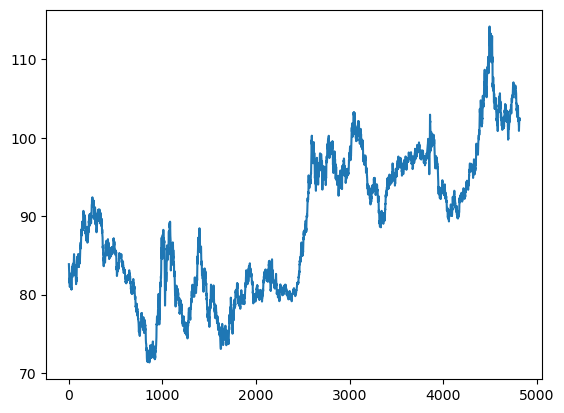

In [3]:
plt.plot(raw['SPDR'], label='SPDR')